<a href="https://colab.research.google.com/github/ThivyaTS/cnc-colab-data-versioning/blob/main/cnc-anomaly-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/cnc-project/data_v1_train/train.csv')
train.head()

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN


In [ ]:
mapping = {'Prep': 0,
 'Layer 1 Up': 1,
 'Layer 1 Down': 2,
 'Repositioning': 3,
 'Layer 2 Up': 4,
 'Layer 2 Down': 5,
 'Layer 3 Up': 6,
 'Layer 3 Down': 7,
 'End': 8}

In [ ]:
frames = []
for i in range(1,19):
    ex_num = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv("/content/drive/MyDrive/cnc-project/data_v1_experiment/experiment_{}.csv".format(ex_num))

    ex_result_row = train[train['No'] == i]

    frame['Machining_Process'].replace(mapping, inplace=True)

    frame['feedrate'] = ex_result_row.iloc[0]['feedrate']
    frame['clamp_pressure'] = ex_result_row.iloc[0]['clamp_pressure']
    frame['machining_finalized'] = ex_result_row.iloc[0]['machining_finalized']
    frame['tool_condition'] = ex_result_row.iloc[0]['tool_condition']
    frame['material']= ex_result_row.iloc[0]['material']
    frames.append(frame)

<ipython-input-131-cc141f084fed>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  frame['Machining_Process'].replace(mapping, inplace=True)
<ipython-input-131-cc141f084fed>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
frames[0]

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,machining_finalized,tool_condition,material
0,198.0,0.000,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,12.0,1.0,0.0,50.0,Starting,6,4.0,yes,unworn,wax
1,198.0,-10.800,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,12.0,1.0,4.0,50.0,0,6,4.0,yes,unworn,wax
2,196.0,-17.800,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,12.0,1.0,7.0,50.0,0,6,4.0,yes,unworn,wax
3,194.0,-18.000,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,12.0,1.0,7.0,50.0,0,6,4.0,yes,unworn,wax
4,193.0,-17.900,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,12.0,1.0,7.0,50.0,0,6,4.0,yes,unworn,wax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,141.0,0.175,87.50,141.0,0.0,0.000000,-2.84,0.0522,325.0,7.39,...,12.0,1.0,132.0,50.0,end,6,4.0,yes,unworn,wax
1051,141.0,-0.150,-87.50,141.0,0.0,0.000000,-1.85,0.0522,325.0,2.69,...,12.0,1.0,132.0,50.0,end,6,4.0,yes,unworn,wax
1052,141.0,-0.175,-87.50,141.0,0.0,0.000000,-2.20,0.0527,325.0,2.22,...,12.0,1.0,132.0,50.0,end,6,4.0,yes,unworn,wax
1053,141.0,0.150,87.50,141.0,0.0,0.000000,-4.02,0.0502,326.0,5.80,...,12.0,1.0,132.0,50.0,end,6,4.0,yes,unworn,wax


In [ ]:
combined_df = pd.concat(frames, axis=0)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25286 entries, 0 to 2252
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  float64
 

In [ ]:
pd.isnull(combined_df).sum()

,0
X1_ActualPosition,0
X1_ActualVelocity,0
X1_ActualAcceleration,0
X1_CommandPosition,0
X1_CommandVelocity,0
X1_CommandAcceleration,0
X1_CurrentFeedback,0
X1_DCBusVoltage,0
X1_OutputCurrent,0
X1_OutputVoltage,0


Text(0, 0.5, 'Count')

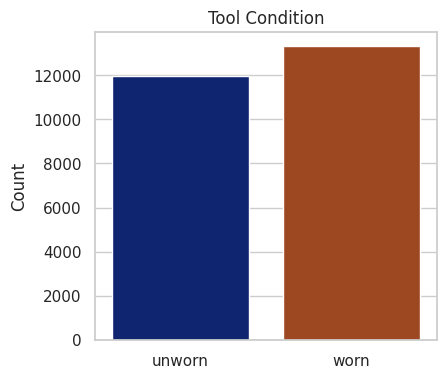

In [ ]:
# Set up the figure
plt.figure(figsize=(15, 4))
sns.set(style="whitegrid")

# Plot 1: tool_condition
plt.subplot(1, 3, 1)
sns.countplot(data=combined_df, x='tool_condition', hue = 'tool_condition', palette='dark')
plt.title('Tool Condition')
plt.xlabel('')
plt.ylabel('Count')

In [ ]:
# Select object (categorical) columns
cat_cols = combined_df.select_dtypes(include=['object']).columns

# Print unique values for each categorical column
for col in cat_cols:
    print(f"Column: {col}")
    print(combined_df[col].unique())  # or use .value_counts() for frequencies
    print("\n")

Column: Machining_Process
['Starting' 0 1 2 3 4 5 6 7 'end' 8]


Column: machining_finalized
['yes' 'no']


Column: tool_condition
['unworn' 'worn']


Column: material
['wax']




In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select object (categorical) columns
cat_cols = combined_df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col].astype(str))
    label_encoders[col] = le  # Save encoders for inverse transform later

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25286 entries, 0 to 2252
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  float64
 

Text(0, 0.5, 'Count')

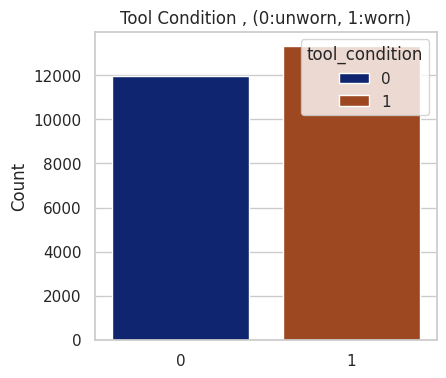

In [ ]:
# Set up the figure
plt.figure(figsize=(15, 4))
sns.set(style="whitegrid")

# Plot 1: tool_condition
plt.subplot(1, 3, 1)
sns.countplot(data=combined_df, x='tool_condition', hue = 'tool_condition', palette='dark')
plt.title('Tool Condition , (0:unworn, 1:worn)')
plt.xlabel('')
plt.ylabel('Count')

In [ ]:
combined_df['material'].nunique()

1

In [ ]:
combined_df.drop('material', axis=1, inplace=True)

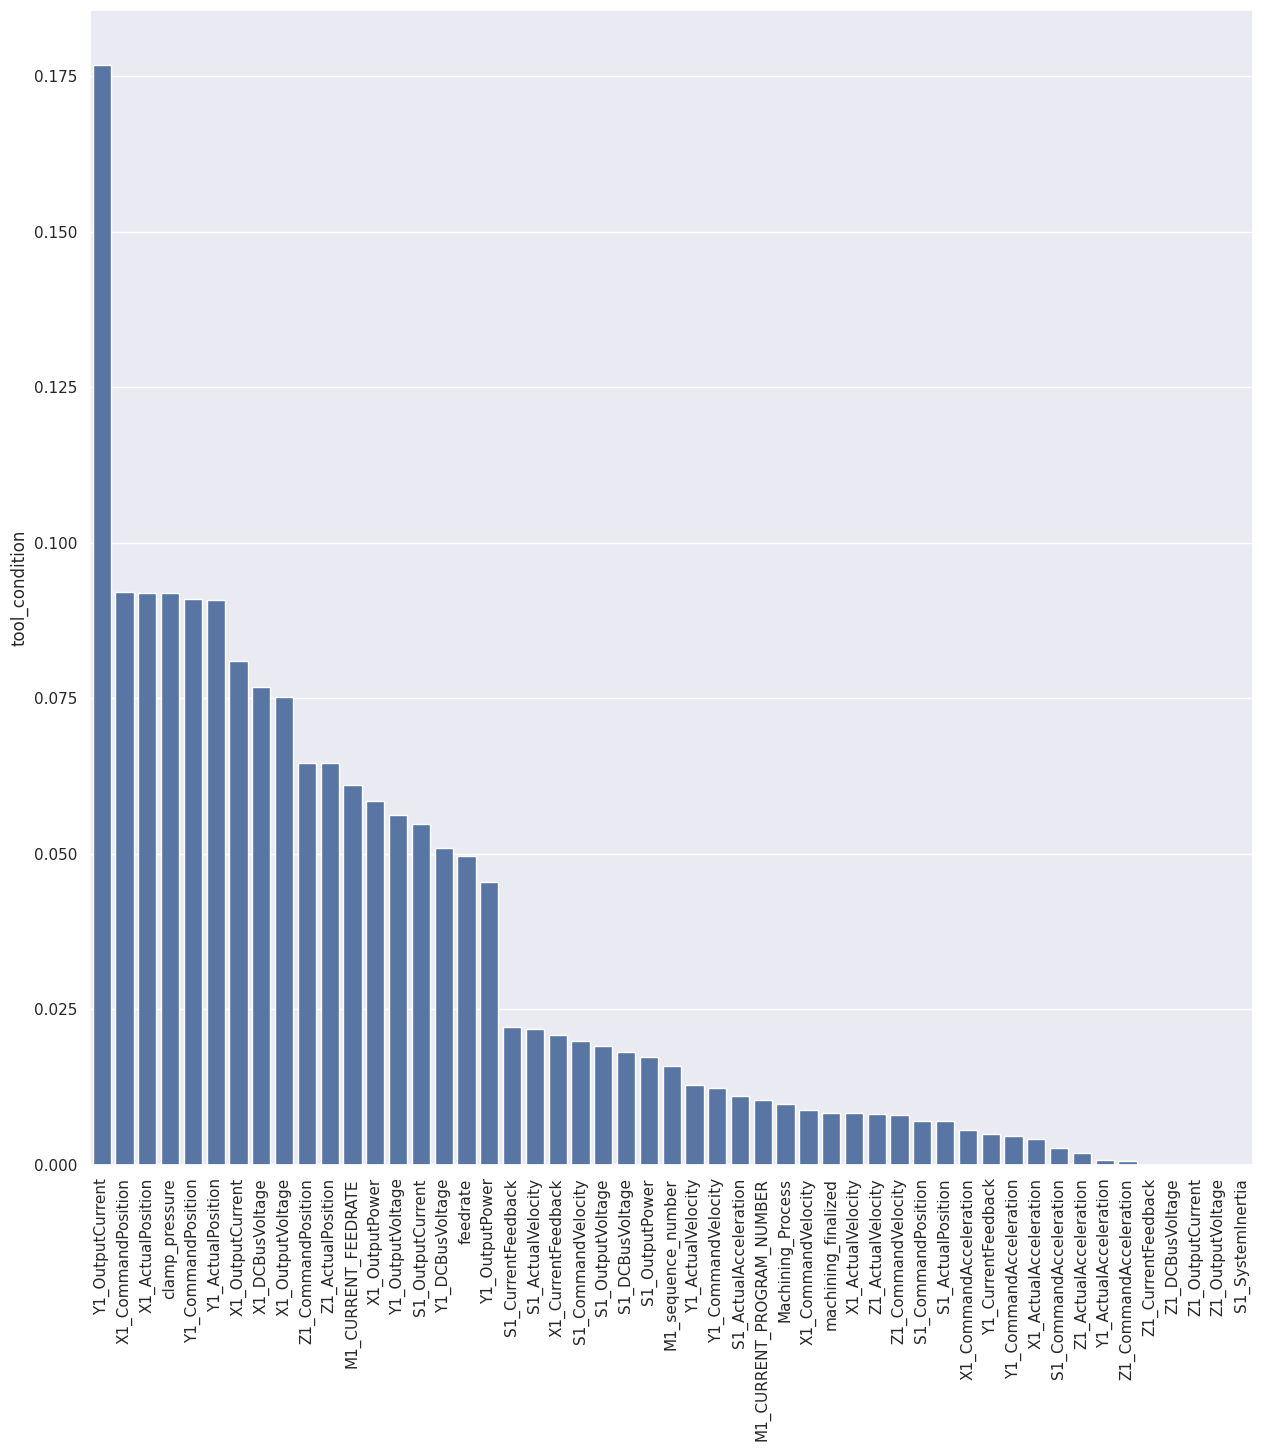

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(15,15))
a = combined_df.corr()
a = abs(a)
a.sort_values(by = ["tool_condition"], ascending=False, inplace=True)
x = a['tool_condition'][1:]
y = a.index[1:]
#print(len(x), len(y))
sns.set()
sns.barplot(x, ax=ax)
ax.tick_params(axis = "x", rotation = 90)

In [ ]:
combined_df.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,machining_finalized,tool_condition
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,6.960000e-07,12.0,1.0,0.0,50.0,9,6,4.0,1,0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,-5.270000e-07,12.0,1.0,4.0,50.0,0,6,4.0,1,0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,9.100000e-07,12.0,1.0,7.0,50.0,0,6,4.0,1,0
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,1.070000e-06,12.0,1.0,7.0,50.0,0,6,4.0,1,0
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,1.960000e-06,12.0,1.0,7.0,50.0,0,6,4.0,1,0
